# Summary pre-processing trick

1. Reading data
2. Missing value
3. Format convert
4. Outiler value
5. Data standard

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# 1. Reading Data

EDA = Exploratory Data Analysis 探索式資料分析

In [39]:
df = pd.read_csv("../../data/WWII_Weather.csv", low_memory=False) # DtypeWarning: Columns (7,8,18,25) have mixed
print(df.shape)
df.head()

(119040, 31)


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# show all columns and non-null data count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

## 2. Missing value

    (i).   Mean
    (ii).  Median
    (iii). Mode (眾數=出現最多次的數)
    (iv).  Zero
    (v).   Predict (依照經驗給定特定值，小心overfitting)

In [41]:
# 根據本次範例，WW-II 氣溫預測，可以發現目標MEA有missing data，先排除沒有該值的Row(remove unlabel data)
df = df.dropna(subset=["MEA"])
df.shape

(118542, 31)

In [42]:
## check null data
df.isnull().sum()

STA                 0
Date                0
Precip              0
WindGustSpd    118010
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1150
PoorWeather     84328
YR                  0
MO                  0
DA                  0
PRCP             1921
DR             118009
SPD            118010
MAX                 0
MIN                 2
MEA                 0
SNF              1150
SND            112981
FT             118542
FB             118542
FTI            118542
ITH            118542
PGT            118017
TSHDSBRSGF      84328
SD3            118542
RHX            118542
RHN            118542
RVG            118542
WTE            118542
dtype: int64

In [43]:
# 判讀null data 有完全是null的col，直接刪除
 
whole_null_list = df.columns[(df.isnull().sum() == df.shape[0])]
print(whole_null_list)


df = df.drop(whole_null_list, axis=1) # axis=1 remove from col
df.shape

Index(['FT', 'FB', 'FTI', 'ITH', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'], dtype='object')


(118542, 22)

## 判讀columns可以發現重複的數據 remove them

### Max/Min/Mean Temp and MAX/MIN/MEA 

前者為攝氏，後者為華氏，且因華氏的資料的缺，但攝氏溫度無缺，應該為溫度轉換時，將空資料預設為0度，因此要以華氏為主

處理:
   1. 將攝氏資料(MaxTemp/MinTemp/MeanTemp)從資料中刪除
   3. MAX & MIN 刪除，因為MEAN = (MAX + MIN)/2

In [44]:
# remove repeat term

# temperature
df = df.drop(["MaxTemp", "MinTemp", "MeanTemp", "MAX", "MIN"], axis=1)

# PoorWeather repeat of the TSHDSBRSGF column
df = df.drop(["PoorWeather"], axis=1)

# Date已經處理成YY/MM/DD
#df = df.drop(["Date"], axis=1) # 留著練習分割

# 降雨量mm 與 英尺的差異
df = df.drop(["Precip"], axis=1)

# 風速mm 與 英尺的差異
df = df.drop(["WindGustSpd"], axis=1)

# 降雪量mm 與 英尺的差異
df = df.drop(["Snowfall"], axis=1)

# SNF 為0 or null 直接刪除
df = df.drop(["SNF"], axis=1)

In [45]:
# other missing data
# 假設 無數據 = 無風無雨 所以沒資料 補0

# DR: Peak wind gust direction in tens of degrees
df["DR"] = df["DR"].fillna(0)
# SPD: Peak wind gust speed in knots
df["SPD"] = df["SPD"].fillna(0)
# SND: Snow depth (includes ice pellets) recorded at 1200 GMT except 0000 GMT in Far East Asian Area in inches and tenths
df["SND"] = df["SND"].fillna(0)
# PGT: Peak wind gust time (hours and tenths)
df["PGT"] = df["PGT"].fillna(0)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118542 entries, 0 to 119039
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   STA         118542 non-null  int64  
 1   Date        118542 non-null  object 
 2   YR          118542 non-null  int64  
 3   MO          118542 non-null  int64  
 4   DA          118542 non-null  int64  
 5   PRCP        116621 non-null  object 
 6   DR          118542 non-null  float64
 7   SPD         118542 non-null  float64
 8   MEA         118542 non-null  float64
 9   SND         118542 non-null  float64
 10  PGT         118542 non-null  float64
 11  TSHDSBRSGF  34214 non-null   object 
dtypes: float64(5), int64(4), object(3)
memory usage: 11.8+ MB


## 3. Format convert

    (i).  String to integer
    (ii). Date split

In [47]:
# before
df.iloc[[12520, 35891]]

,STA,Date,YR,MO,DA,PRCP,DR,SPD,MEA,SND,PGT,TSHDSBRSGF
12637,10718,1945-12-6,45,12,6,1.33,0.0,0.0,74.0,0.0,0.0,1 1
36277,12706,1945-6-21,45,6,21,0.01,0.0,0.0,84.0,0.0,0.0,101000


In [48]:
# (i).  String to integer
# 處理 TSHDSBRSGF
# 惡劣天氣的紀錄 one-hot-encode

# null -> 0
df["TSHDSBRSGF"] = df["TSHDSBRSGF"].fillna(0)
# 1  1 -> T=1, S=0, H=0, D=1 0000
# 1001 -> 同上
#df["TSHDSBRSGF"] = f["TSHDSBRSGF"] 

df["TSHDSBRSGF"] = df["TSHDSBRSGF"].astype("str")

list_weather = "TSHDSBRSGF"

for idx, weather in zip(range(len(list_weather)), list_weather):
    df[weather] = df["TSHDSBRSGF"].apply(lambda x : x[idx] if idx < len(x) else 0)
    df[weather] = df[weather].replace(" ", 0)
    df[weather] = df[weather].astype("int64")

df = df.drop(["TSHDSBRSGF"], axis=1)

In [49]:
# after
df.iloc[[12520, 35891]]

,STA,Date,YR,MO,DA,PRCP,DR,SPD,MEA,SND,PGT,T,S,H,D,B,R,G,F
12637,10718,1945-12-6,45,12,6,1.33,0.0,0.0,74.0,0.0,0.0,1,0,1,0,0,0,0,0
36277,12706,1945-6-21,45,6,21,0.01,0.0,0.0,84.0,0.0,0.0,1,0,1,0,0,0,0,0


In [50]:
# PRCP float64 and str(T)
# T is trace, 代表很少的降水量，無法準確量測，但會讓地面濕滑...

# null -> 0
df["PRCP"] = df["PRCP"].fillna(0)
# T -> 0.001 量測最小單位=0.01，因此將T設為0.001
df["PRCP"] = df["PRCP"].replace("T", 0.001)
df["PRCP"] = df["PRCP"].astype("float64")

In [51]:
# (ii). Date split
# 處理 Date，雖然YR/MO/DA 有想要的資訊，但在練習一次



In [60]:
df = df.drop(["Date"], axis=1)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118542 entries, 0 to 119039
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   STA     118542 non-null  int64  
 1   Date    118542 non-null  object 
 2   YR      118542 non-null  int64  
 3   MO      118542 non-null  int64  
 4   DA      118542 non-null  int64  
 5   PRCP    118542 non-null  float64
 6   DR      118542 non-null  float64
 7   SPD     118542 non-null  float64
 8   MEA     118542 non-null  float64
 9   SND     118542 non-null  float64
 10  PGT     118542 non-null  float64
 11  T       118542 non-null  int64  
 12  S       118542 non-null  int64  
 13  H       118542 non-null  int64  
 14  D       118542 non-null  int64  
 15  B       118542 non-null  int64  
 16  R       118542 non-null  int64  
 17  G       118542 non-null  int64  
 18  F       118542 non-null  int64  
dtypes: float64(6), int64(12), object(1)
memory usage: 18.1+ MB


## 4. Outiler value

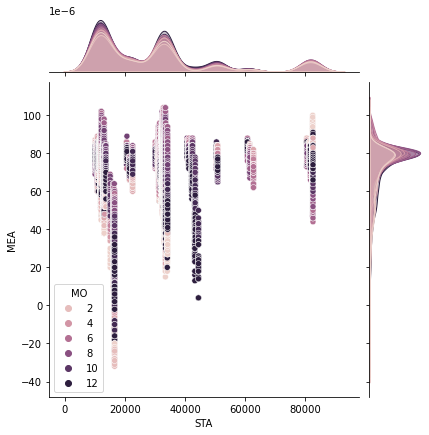

In [53]:
sns.jointplot(x="STA", y="MEA", hue="MO", data=df)

In [56]:
# assume STA < 20000 is outiler value
df2 = df[(df["STA"] > 20000)]
df2 

,STA,Date,YR,MO,DA,PRCP,DR,SPD,MEA,SND,PGT,T,S,H,D,B,R,G,F
49680,20501,1941-11-3,41,11,3,0.00,0.0,0.0,85.0,0.0,0.0,0,0,0,0,0,0,0,0
49681,20501,1941-11-4,41,11,4,0.00,0.0,0.0,82.0,0.0,0.0,0,0,0,0,0,0,0,0
49682,20501,1941-11-5,41,11,5,0.00,0.0,0.0,85.0,0.0,0.0,0,0,0,0,0,0,0,0
49683,20501,1941-11-6,41,11,6,0.00,0.0,0.0,85.0,0.0,0.0,0,0,0,0,0,0,0,0
49684,20501,1941-11-7,41,11,7,1.28,0.0,0.0,81.0,0.0,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,45,12,27,0.00,0.0,0.0,74.0,0.0,0.0,0,0,0,0,0,0,0,0
119036,82506,1945-12-28,45,12,28,0.39,0.0,0.0,75.0,0.0,0.0,1,0,0,0,0,0,0,0
119037,82506,1945-12-29,45,12,29,0.00,0.0,0.0,74.0,0.0,0.0,1,0,0,0,0,0,0,0
119038,82506,1945-12-30,45,12,30,0.00,0.0,0.0,74.0,0.0,0.0,0,0,0,0,0,0,0,0


# 5. Data Standard / Max / Min Scaler

Surprisingly, feature scaling doesn’t improve the regression performance in our case. Actually, following the same steps on well-known toy datasets won’t increase the model’s success.

However, this doesn’t mean feature scaling is unnecessary for linear regression. Even the sci-kit implementation has a boolean normalize parameter to automatically normalize the input when set to True.

Instead, this result reminds us that there’s no fit for all preprocessing methods in machine learning. We need to carefully examine the dataset and apply customized methods.

EX: 

Original Data: MSE = 109.75, R^2 = 0.59

Normalized Data: MSE = 109.75, R^2 = 0.59

Standardalized Data: MSE = 109.75, R^2 = 0.59

In [61]:
# 數據scale轉換
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

# StandardScaler = 
df_SS = StandardScaler().fit_transform(df)
df_SS = pd.DataFrame(df_SS, columns=df.columns)
df_SS

,STA,YR,MO,DA,PRCP,DR,SPD,MEA,SND,PGT,T,S,H,D,B,R,G,F
0,-0.940444,-1.598213,0.080211,-1.681998,-0.204823,-0.058524,-0.064773,0.165727,0.0,-0.06025,-0.625609,-0.002904,-0.050873,-0.025329,-0.044091,-0.062619,0.0,-0.024308
1,-0.940444,-1.598213,0.080211,-1.568300,-0.298814,-0.058524,-0.064773,0.376831,0.0,-0.06025,-0.625609,-0.002904,-0.050873,-0.025329,-0.044091,-0.062619,0.0,-0.024308
2,-0.940444,-1.598213,0.080211,-1.454602,-0.063837,-0.058524,-0.064773,0.236095,0.0,-0.06025,-0.625609,-0.002904,-0.050873,-0.025329,-0.044091,-0.062619,0.0,-0.024308
3,-0.940444,-1.598213,0.080211,-1.340905,-0.063837,-0.058524,-0.064773,0.236095,0.0,-0.06025,-0.625609,-0.002904,-0.050873,-0.025329,-0.044091,-0.062619,0.0,-0.024308
4,-0.940444,-1.598213,0.080211,-1.227207,-0.298814,-0.058524,-0.064773,0.236095,0.0,-0.06025,-0.625609,-0.002904,-0.050873,-0.025329,-0.044091,-0.062619,0.0,-0.024308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118537,2.519014,1.049217,1.539436,1.274143,-0.298814,-0.058524,-0.064773,0.095360,0.0,-0.06025,-0.625609,-0.002904,-0.050873,-0.025329,-0.044091,-0.062619,0.0,-0.024308
118538,2.519014,1.049217,1.539436,1.387841,0.617599,-0.058524,-0.064773,0.165727,0.0,-0.06025,1.598442,-0.002904,-0.050873,-0.025329,-0.044091,-0.062619,0.0,-0.024308
118539,2.519014,1.049217,1.539436,1.501538,-0.298814,-0.058524,-0.064773,0.095360,0.0,-0.06025,1.598442,-0.002904,-0.050873,-0.025329,-0.044091,-0.062619,0.0,-0.024308
118540,2.519014,1.049217,1.539436,1.615236,-0.298814,-0.058524,-0.064773,0.095360,0.0,-0.06025,-0.625609,-0.002904,-0.050873,-0.025329,-0.044091,-0.062619,0.0,-0.024308


In [62]:
# MinMaxScaler = 
df_SS = MinMaxScaler().fit_transform(df)
df_SS = pd.DataFrame(df_SS, columns=df.columns)
df_SS

,STA,YR,MO,DA,PRCP,DR,SPD,MEA,SND,PGT,T,S,H,D,B,R,G,F
0,0.0,0.4,0.545455,0.000000,0.003306,0.0,0.0,0.786765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.4,0.545455,0.033333,0.000000,0.0,0.0,0.808824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.4,0.545455,0.066667,0.008264,0.0,0.0,0.794118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.4,0.545455,0.100000,0.008264,0.0,0.0,0.794118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.4,0.545455,0.133333,0.000000,0.0,0.0,0.794118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118537,1.0,1.0,1.000000,0.866667,0.000000,0.0,0.0,0.779412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
118538,1.0,1.0,1.000000,0.900000,0.032231,0.0,0.0,0.786765,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
118539,1.0,1.0,1.000000,0.933333,0.000000,0.0,0.0,0.779412,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
118540,1.0,1.0,1.000000,0.966667,0.000000,0.0,0.0,0.779412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
# Normalizer =
df_SS = Normalizer().fit_transform(df)
df_SS = pd.DataFrame(df_SS, columns=df.columns)
df_SS

,STA,YR,MO,DA,PRCP,DR,SPD,MEA,SND,PGT,T,S,H,D,B,R,G,F
0,0.999963,0.004199,0.000700,0.000100,0.000004,0.0,0.0,0.007499,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.999961,0.004199,0.000700,0.000200,0.000000,0.0,0.0,0.007799,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.999962,0.004199,0.000700,0.000300,0.000010,0.0,0.0,0.007599,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.999962,0.004199,0.000700,0.000400,0.000010,0.0,0.0,0.007599,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.999962,0.004199,0.000700,0.000500,0.000000,0.0,0.0,0.007599,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118537,0.999999,0.000545,0.000145,0.000327,0.000000,0.0,0.0,0.000897,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
118538,0.999999,0.000545,0.000145,0.000339,0.000005,0.0,0.0,0.000909,0.0,0.0,0.000012,0.0,0.0,0.0,0.0,0.0,0.0,0.0
118539,0.999999,0.000545,0.000145,0.000351,0.000000,0.0,0.0,0.000897,0.0,0.0,0.000012,0.0,0.0,0.0,0.0,0.0,0.0,0.0
118540,0.999999,0.000545,0.000145,0.000364,0.000000,0.0,0.0,0.000897,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
